In [2]:
# Fuentes y recursos:
# https://rpubs.com/FelipeRego/MultipleLinearRegressionInRFirstSteps
# https://onlinecourses.science.psu.edu/stat501/node/284
# http://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables

# Leemos los datos de un archivo online
datos_prestige <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/Prestige.csv", header=TRUE)

# Obtenemos un resumen estadístico del conjunto de datos
summary(datos_prestige)

   education          income          women           prestige    
 Min.   : 6.380   Min.   :  611   Min.   : 0.000   Min.   :14.80  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 3.592   1st Qu.:35.23  
 Median :10.540   Median : 5930   Median :13.600   Median :43.60  
 Mean   :10.738   Mean   : 6798   Mean   :28.979   Mean   :46.83  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:52.203   3rd Qu.:59.27  
 Max.   :15.970   Max.   :25879   Max.   :97.510   Max.   :87.20  
     census       type   
 Min.   :1113   bc  :44  
 1st Qu.:3120   prof:31  
 Median :5135   wc  :23  
 Mean   :5402   NA's: 4  
 3rd Qu.:8312            
 Max.   :9517            

corrplot 0.84 loaded


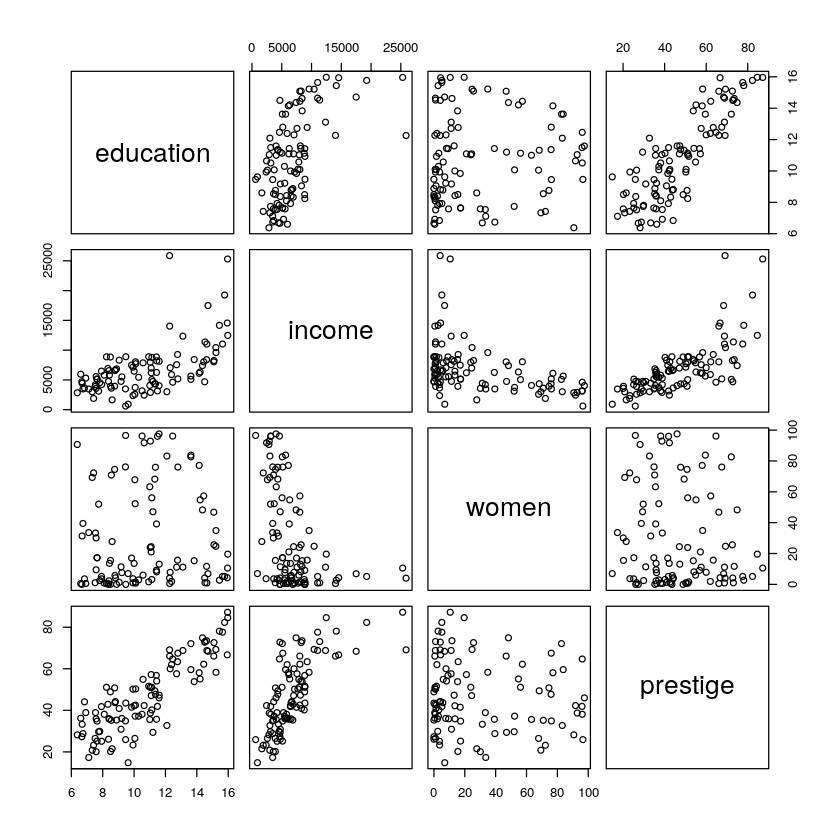

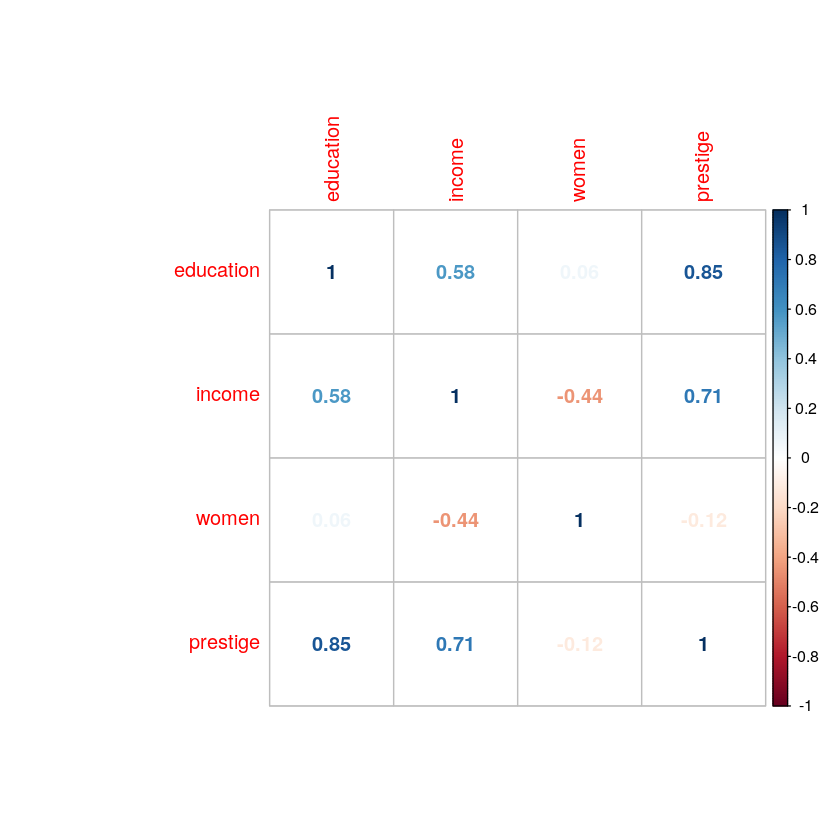

In [3]:
# Usaremos las variables
# education, income, women, prestige

datos_prestige <- datos_prestige[c("education", "income", "women", "prestige")]

# Es importante realizar un análisis exploratorio de los datos
# Vea:

# Graficamos una matriz de diagramas de dispersión
pairs(datos_prestige)

# esta librería debe ser instalada usando install.packages("corrplot")
library(corrplot)
correlaciones = cor(datos_prestige)
corrplot(correlaciones, method = "number")

In [4]:
# Construimos el modelo de regresión lineal múltiple
# Income=B0+B1∗Education+B2∗Prestige+B3∗Women

modelo1 <- lm(income ~ education + prestige + women, data=datos_prestige)

# Vemos un resumen del modelo
# (identifique los valores importantes que resumen el modelo)
summary(modelo1)

# El valor R2 es 0.6432. Esto nos dice que el 64.32% de la variación en income, 
# es explicada por education, prestige y women.

# ¿Cuáles es la importancia de los predictores (variables controlables)?


Call:
lm(formula = income ~ education + prestige + women, data = datos_prestige)

Residuals:
    Min      1Q  Median      3Q     Max 
-7715.3  -929.7  -231.2   689.7 14391.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -253.850   1086.157  -0.234    0.816    
education    177.199    187.632   0.944    0.347    
prestige     141.435     29.910   4.729 7.58e-06 ***
women        -50.896      8.556  -5.948 4.19e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2575 on 98 degrees of freedom
Multiple R-squared:  0.6432,	Adjusted R-squared:  0.6323 
F-statistic: 58.89 on 3 and 98 DF,  p-value: < 2.2e-16


In [5]:
modelo2 = lm(income ~ prestige + women, data=datos_prestige)

summary(modelo2)

# El modelo2 ha mejorado tenemos una F mayor que el modelo1,
# pero no se logró una mejora sustancial en el error 
# estándar residual y el valor de R cuadrado ajustado. 
# Esto posiblemente se deba a la presencia de puntos atípicos en los datos.

# Como podemos usar R2 ajustado para escoger el mejor modelo:
# http://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables


Call:
lm(formula = income ~ prestige + women, data = datos_prestige)

Residuals:
    Min      1Q  Median      3Q     Max 
-7620.9 -1008.7  -240.4   873.1 14180.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  431.574    807.630   0.534    0.594    
prestige     165.875     14.988  11.067  < 2e-16 ***
women        -48.385      8.128  -5.953 4.02e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2573 on 99 degrees of freedom
Multiple R-squared:   0.64,	Adjusted R-squared:  0.6327 
F-statistic: 87.98 on 2 and 99 DF,  p-value: < 2.2e-16


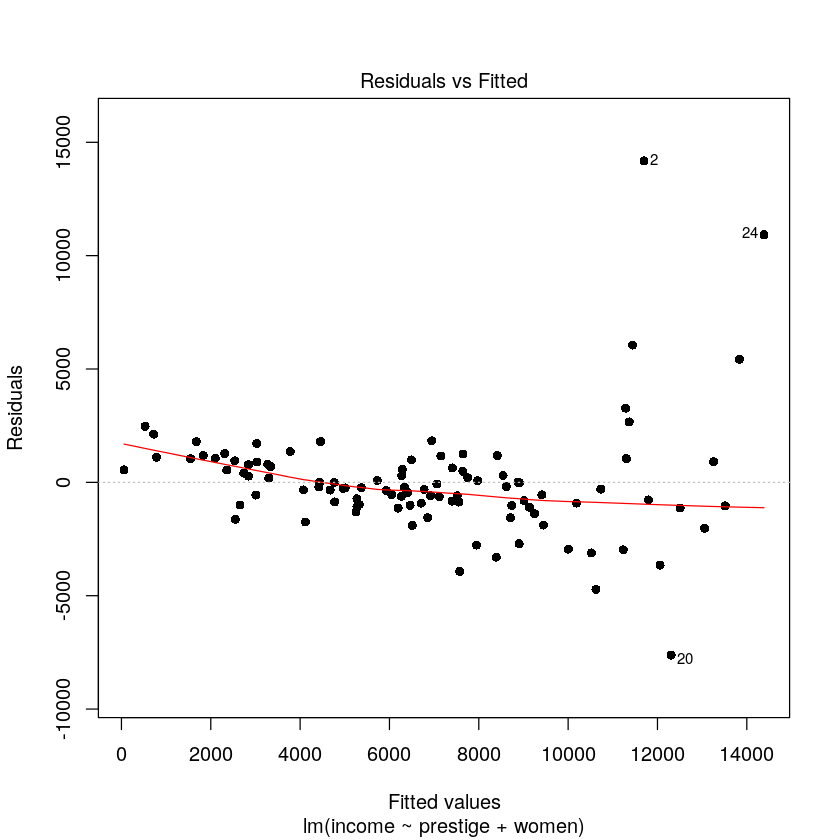

In [6]:
plot(modelo2, pch=16, which=1)

# Vea: https://stats.stackexchange.com/questions/76226/interpreting-the-residuals-vs-fitted-values-plot-for-verifying-the-assumptions

In [7]:
# Veamos los resultados de uno de los modelos
coef(modelo2)

# Recuerde que podemos hacer predicción

newdata = data.frame(prestige=48.5, women=24.6)

predict(modelo2, newdata, interval="confidence")

(Intercept)    prestige       women 
  431.57441   165.87480   -48.38473

fit,lwr,upr
7286.238,6774.168,7798.308
